# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [4]:
train_data = data.sample(frac=0.7, random_state=42)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [5]:
test_data = data.drop(train_data.index)
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [6]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [7]:
test_features, test_target = get_features_and_target(test_data)
test_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,female,38.0,1,0,71.2833
4,3,male,35.0,0,0,8.0500
13,3,male,39.0,1,5,31.2750
14,3,female,14.0,0,0,7.8542
20,2,male,35.0,0,0,26.0000


In [8]:
train_features, train_target = get_features_and_target(train_data)
train_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
709,3,male,NaN,1,1,15.2458
439,2,male,31.0,0,0,10.5000
840,3,male,20.0,0,0,7.9250
720,2,female,6.0,0,1,33.0000
39,3,female,14.0,1,0,11.2417


#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

Для начала построим тепловую карту по марице корреляций признаков. Это необходимо для того, чтобы посмотреть как зависят признаки друг от друга.

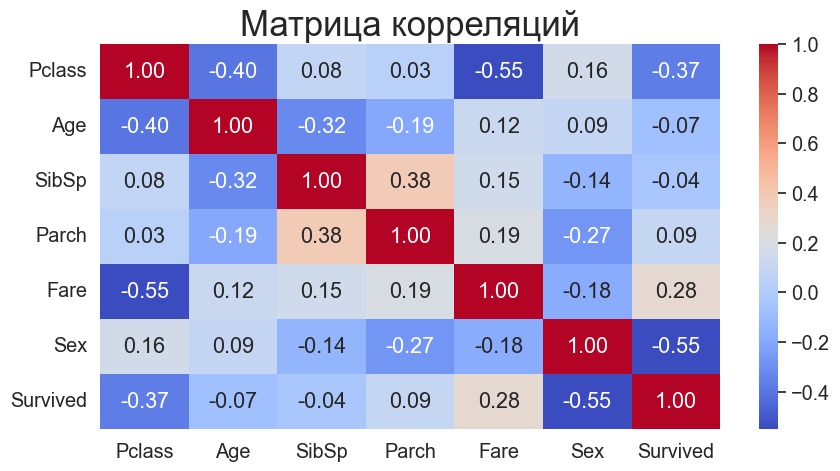

In [9]:
train_sex = (train_features['Sex'] == 'male')
train_df = pd.concat([train_features, train_sex, train_target], axis=1)
corr_matrix = train_df.corr()

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
ax.set_title('Матрица корреляций', fontsize=25)

plt.show()

Из этой тепловой карты нам необходим именно столбец Survived, чтобы оценить влияние признаков на target. 

Из таблицы видно, что наиболее важные признаки являются 'Sex', 'Parh', 'Fare' и 'Pclass'. Рассмотрим подробнее их влияние на целевой признак. Для этого построим гистограммы для каждого из выше перечисленного признака.

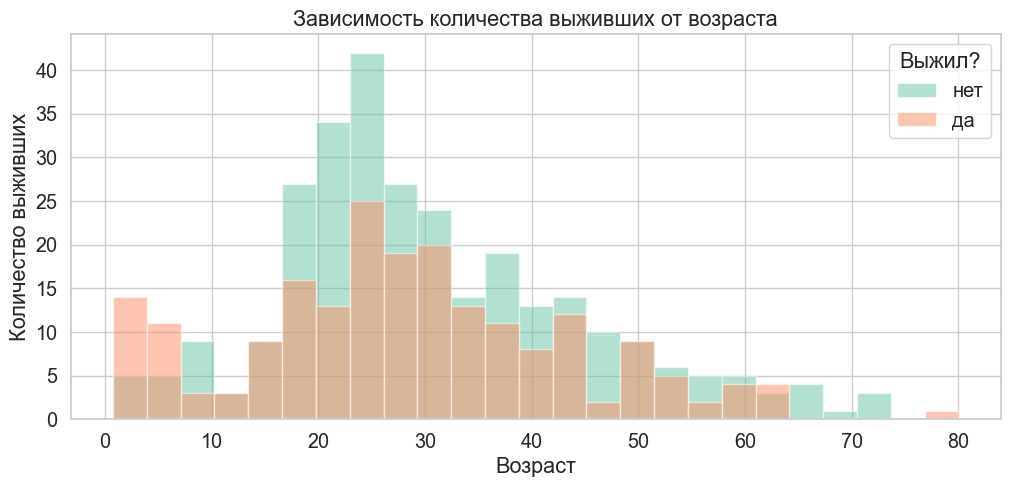

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
bins = 25

age_min = min(train_data['Age'].dropna())
age_max = max(train_data['Age'].dropna())

plt.hist(train_data[train_data['Survived'] == 0]['Age'].dropna(), alpha=0.5, label='нет', bins=bins, range=(age_min, age_max))
plt.hist(train_data[train_data['Survived'] == 1]['Age'].dropna(), alpha=0.5, label='да', bins=bins, range=(age_min, age_max))

plt.legend()
legend = ax.legend()
legend.set_title('Выжил?')

plt.title('Зависимость количества выживших от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')
plt.show()

Стоит, заметить, что для детей до 7 лет количество выживших первышает количетво невыживших. Для остальных возрастов - наоборот.

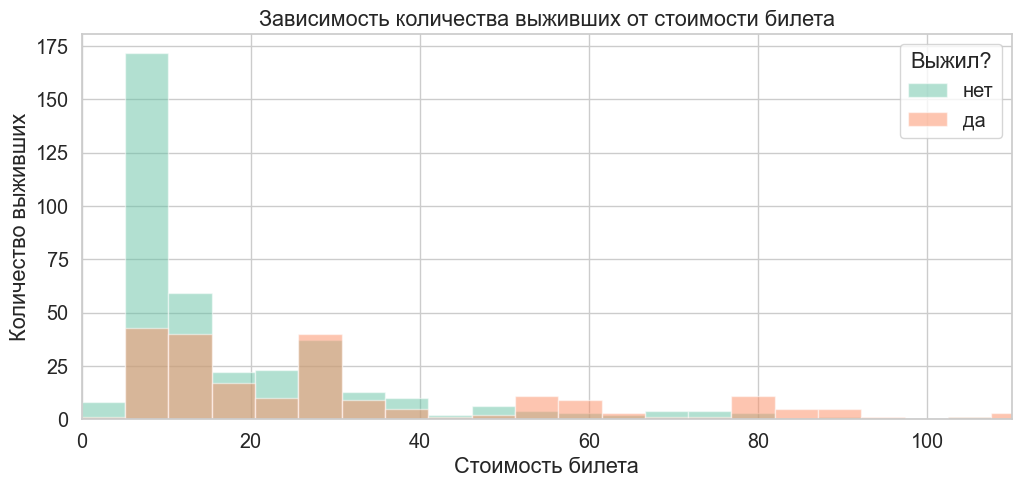

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
bins = 100

age_min = min(train_data['Fare'].dropna())
age_max = max(train_data['Fare'].dropna())

plt.hist(train_data[train_data['Survived'] == 0]['Fare'].dropna(), alpha=0.5, label='нет', bins=bins, range=(age_min, age_max))
plt.hist(train_data[train_data['Survived'] == 1]['Fare'].dropna(), alpha=0.5, label='да', bins=bins, range=(age_min, age_max))

plt.xlim([0, 110])

plt.legend()
legend = ax.legend()
legend.set_title('Выжил?')

plt.title('Зависимость количества выживших от стоимости билета')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество выживших')
plt.show()

Отсюда, чем дороже стоимость билета, тем выше шанс выжить у человека в катастрофе.

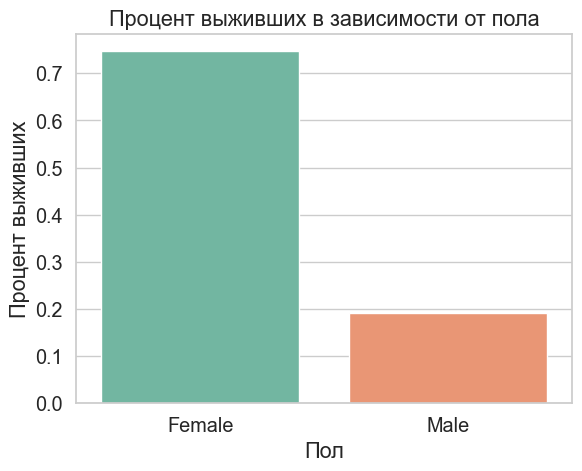

In [12]:
sex_survived = train_data.groupby('Sex')['Survived'].mean()
sns.barplot(x=['Female', 'Male'], y=sex_survived.values)
plt.title('Процент выживших в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Процент выживших')
plt.show()

По данной картинке мы можем сделать вывод, что процент выживших женщин больше, чем мужчин. Причём зависимость давольно чётко показывает закономерность. Поэтому пол человека является ключевым признаком.

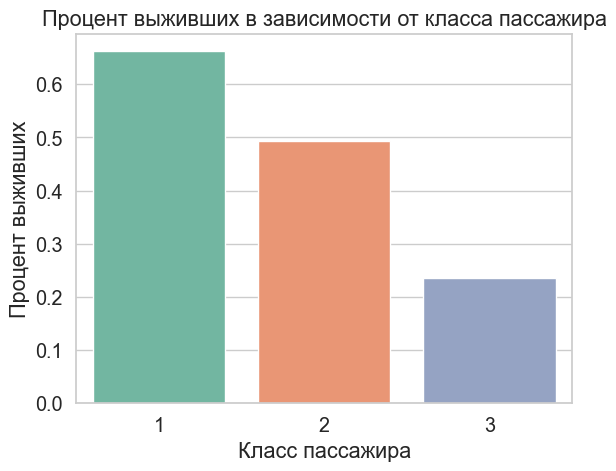

In [13]:
pclass_survived = train_data.groupby('Pclass')['Survived'].mean()
sns.barplot(x=pclass_survived.index, y=pclass_survived.values)
plt.title('Процент выживших в зависимости от класса пассажира')
plt.xlabel('Класс пассажира')
plt.ylabel('Процент выживших')
plt.show()

Вывод: чем выше класс пассажира, тем выше процент выживших, что давольно логично следует из стоимости билета.

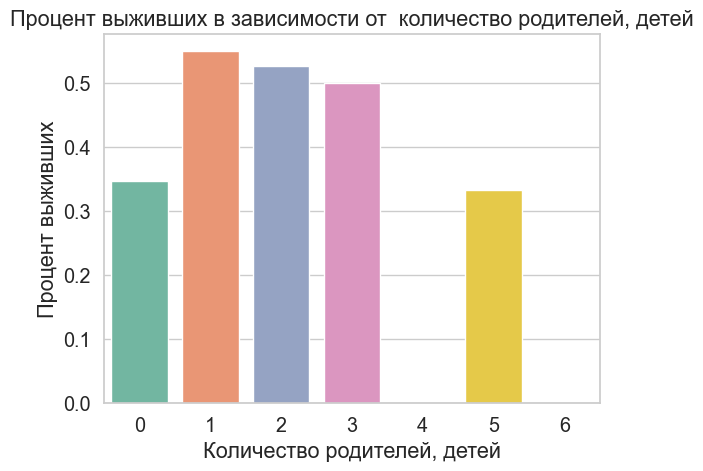

In [14]:
parch_survived = train_data.groupby('Parch')['Survived'].mean()
sns.barplot(x=parch_survived.index, y=parch_survived.values)
plt.title('Процент выживших в зависимости от  количество родителей, детей')
plt.xlabel('Количество родителей, детей')
plt.ylabel('Процент выживших')
plt.show()

Можно увидеть закономерность: для людей, имеющих хотя бы одного родителя/ребёнка: чем больше количество родителей/детей, тем был ниже шанс выжить.

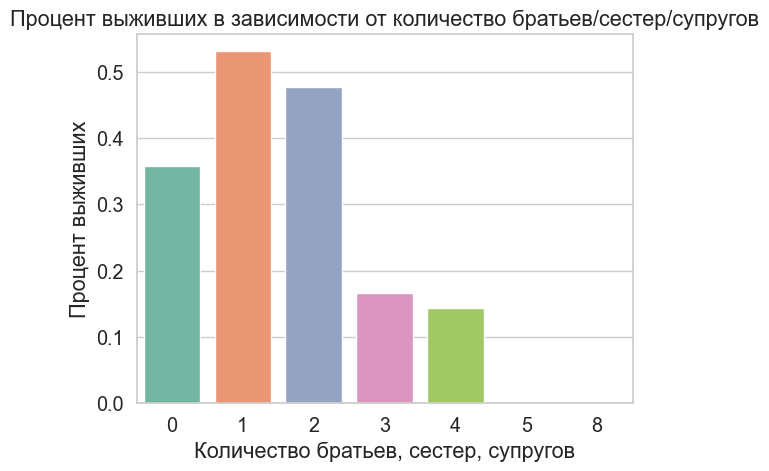

In [15]:
sibsp_survived = train_data.groupby('SibSp')['Survived'].mean()
sns.barplot(x=sibsp_survived.index, y=sibsp_survived.values)
plt.title('Процент выживших в зависимости от количество братьев/сестер/супругов')
plt.xlabel('Количество братьев, сестер, супругов')
plt.ylabel('Процент выживших')
plt.show()

А данная диаграмма очень похожа на предыдущую. При этом здесь ещё чётче показана зависимость процента выживших от количества родных/близких. Можем заметить, что если количество братьев/сестер/супругов больше 2, то шанс выжить резко падает. 

#### Вывод:
Каждый призак так или иначе повлиял на выживаемость человека. Однако выделим ключевые, где прослеживается наиболее чёткая зависимость: пол, класс пассажира, стоимость билета, количество братьев/сестер/супругов.

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Очевидно, просто берем признак пола, как самый значимый. И делаем предположение, что все женщины - выжили, все мужчины - нет.

**Дерево 2:**

Для построения более точного дерева добавим к предыдущей идеи следующие факты.

Если конкретны человек - женского пола, то с большей вероятностью она не выживет, если у неё как минимум в сумме 4 родителей и детей. То есть идея, в том, что у детей не может быть больше 2х родителей. Значит, скорее всего конкретная женщина - не ребёнок. А матери в первую очередь спасают своих детей, жертвуя собой.

Если конкретный человек - мужского пола, то выжить он может с большим шансом, если он ребёнок, то есть младше 10 лет.



Реализуйте полученные деревья по шаблону

In [16]:
def tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    
    ...
    return predicted

In [17]:
def tree1(features):
    return features['Sex'].apply(lambda x: 1 if x == 'female' else 0)

def tree2(features):
    def predict(row):
        if row['Sex'] == 'female':
            return 0 if row['Parch'] >= 4 else 1
        else:
            return 1 if row['Age'] <= 10 else 0
    return features.apply(predict, axis=1)

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:** $\frac{\text{количество совпавших прогнозов с целевым признаком}}{\text{общее количество прогнозов}}$.



Реализуйте данный критерий по шаблону

In [18]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    
    ...

In [19]:
def criteria(target, predicted):
    return (target == predicted).mean()

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [20]:
print('Показатель качества дерева 1: ', criteria(test_target, tree1(test_features)))
print('Показатель качества дерева 2: ', criteria(test_target, tree2(test_features)))

Показатель качества дерева 1:  0.7865168539325843
Показатель качества дерева 2:  0.8089887640449438


**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [21]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    
    ...
    return predicted

Функция ниже находит k ближайших соседей среди множества A для каждого обьекта из B.

In [22]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    n = A.shape[0]
    m = B.shape[0]
    d = A.shape[1]
    extra_matrix = (A.reshape(1, n, d) - B.reshape(m, 1, d)) ** 2
    new_extra = extra_matrix.sum(axis=2) ** 0.5
    return ((np.argsort(new_extra) + 1)[:, 0:k])

In [23]:
def knn(features, train_features, train_target, k=1):
    predicted = pd.Series(index=features.index, dtype='float64')
    
    try:
        features.loc[features['Sex'] == 'male', 'Sex'] = 0
        features.loc[features['Sex'] == 'female', 'Sex'] = 1

        train_features.loc[train_features['Sex'] == 'male', 'Sex'] = 0
        train_features.loc[train_features['Sex'] == 'female', 'Sex'] = 1
    except:
        pass
    
    nearest_neighbors = find_nearest_points(features.values, train_features.values, k)

    num_strings = features.shape[0]
    for obj in range(num_strings):
        neighbors_indexes = nearest_neighbors[obj]
        nearest_neighbors_target = train_target.iloc[neighbors_indexes]
        predicted.iloc[obj] = nearest_neighbors_target.mode()[0]
    return predicted

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

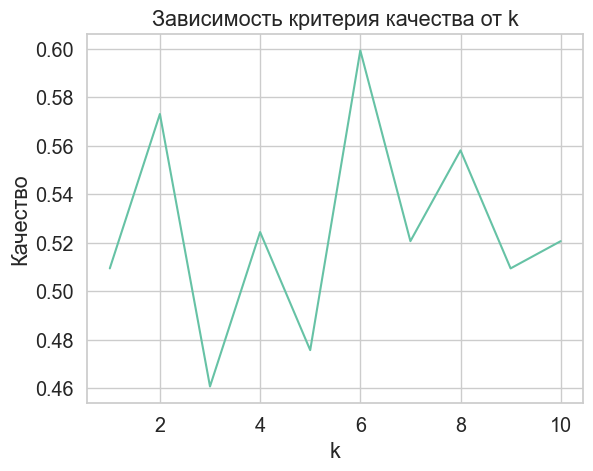

In [24]:
quality = []
for k in range(1, 11):
    predicted = knn(test_features, train_features, train_target, k)
    quality.append(criteria(test_target, predicted))

plt.plot(range(1, 11), quality)
plt.xlabel('k')
plt.ylabel('Качество')
plt.title('Зависимость критерия качества от k')
plt.show()

На данном графике показано, что график постигает пика при k = 6. Данное занчение k является оптимальным для исходного набора данных и максимизирует каечтво алгоритма. Взяв значение левее или правее данного может получиться либо переученная модель, либо недоученная.

#### 6. Выводы

Ключевыми признаками исходного набора данных являются: пол, класс пассажира и цена билета - они имеют наибольшее влияние на целевой признак. Однако невсегда именно ключевые призаки применяются в построении модели анализа данных. Так например, мы использовали возраст человека в методе классификации.

Сравнивая два метода: k ближайших соседей и классификацию, у нас получилась модель построенная по второму методу более точная. А именно качество метода k ближайших соседей - 0.6, а качество классификации - 0.8.

Также существует для каждого набора данных и критерия качества своё оптимальное значение k в метод ближайшего соседа.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

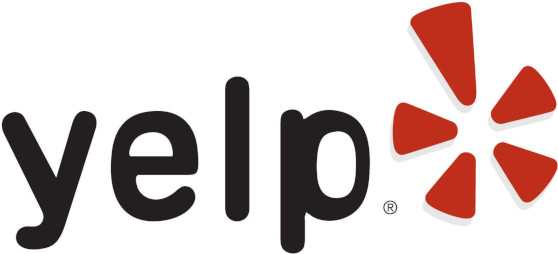

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [25]:
data = pd.read_csv('yelp_business.csv')
data.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [26]:
order_num_companies = data.groupby('city').count()['business_id']
order_num_companies = order_num_companies.sort_values(ascending=False)
order_num_companies.head()

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: business_id, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

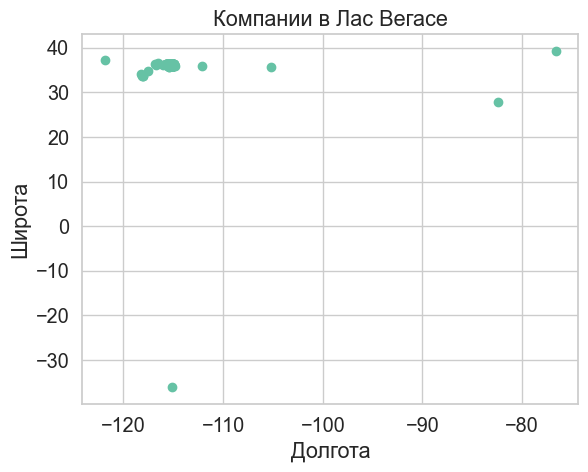

In [27]:
popular_city = order_num_companies.index[0]
data = data[data.city == popular_city]
plt.figure()
plt.scatter(data['longitude'], data['latitude'])

plt.title('Компании в Лас Вегасе')
plt.xlabel("Долгота")
plt.ylabel("Широта")

plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

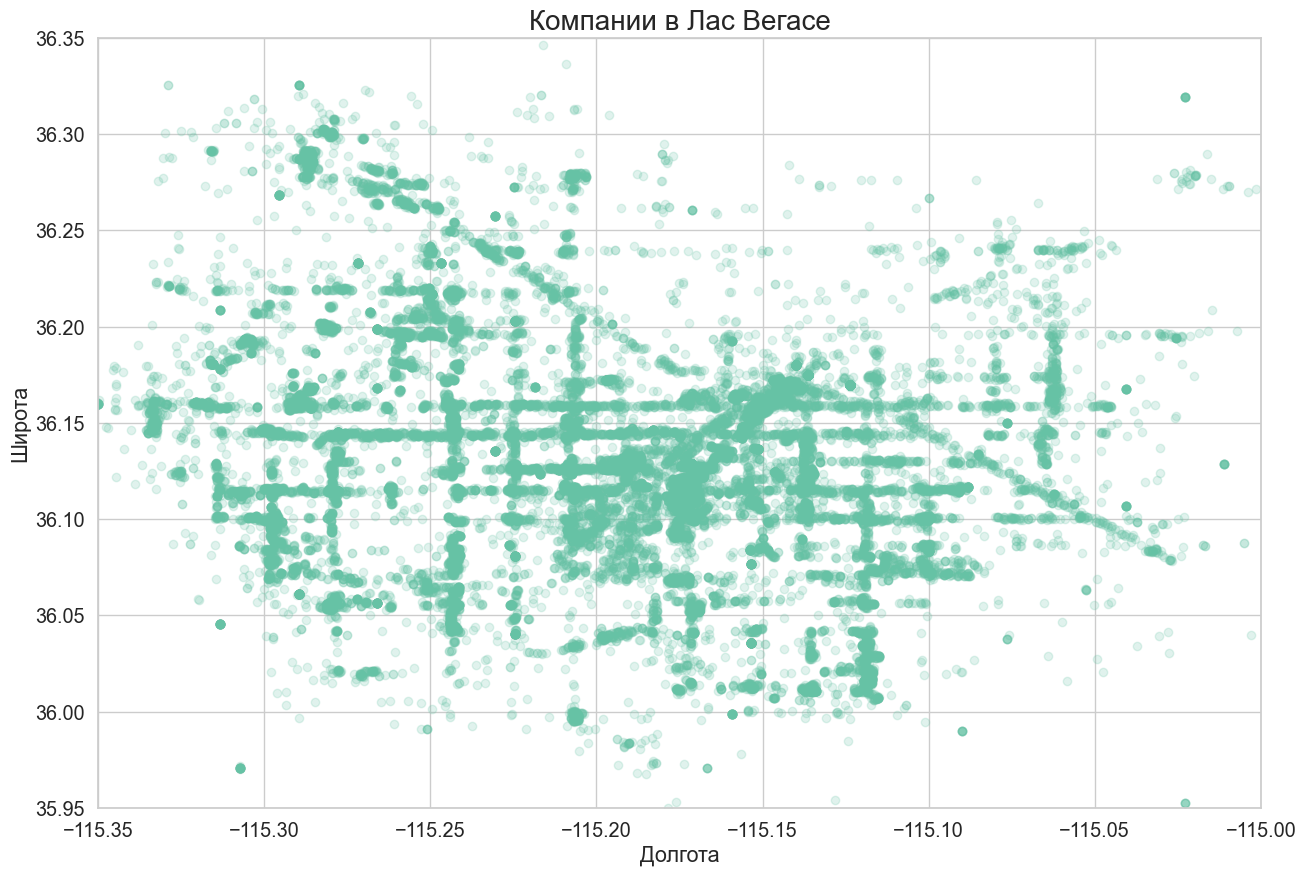

In [28]:
plt.figure(figsize=(15, 10))
plt.scatter(data['longitude'], data['latitude'], alpha = 0.2)
plt.ylim([35.95, 36.35])
plt.xlim([-115.35, -115])

plt.title('Компании в Лас Вегасе', fontsize=20)
plt.xlabel("Долгота")
plt.ylabel("Широта")

plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [29]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

interactive_map = data[(data.city == popular_city) & 
                 (data.longitude >= -115.35) & (data.longitude <= -115) & 
                 (data.latitude >= 35.95) & (data.latitude <= 36.35)]

figure = px.density_mapbox(
    interactive_map,
    mapbox_style="stamen-terrain",
    lat='latitude',
    lon='longitude',
    radius=11
)

plotly.offline.plot(figure, filename='interactive_map.html')

'interactive_map.html'

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [31]:
ratings = pd.read_csv('yelp_review.csv')
ratings.head()

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [32]:
only_las_vegas_ratings = ratings.set_index('business_id').loc[data['business_id']].reset_index()
only_las_vegas_ratings

,business_id,Unnamed: 0,stars
0,kCoE3jvEtg6UVz5SOD3GVw,456053,4
1,kCoE3jvEtg6UVz5SOD3GVw,1093900,1
2,kCoE3jvEtg6UVz5SOD3GVw,2039047,5
3,kCoE3jvEtg6UVz5SOD3GVw,2979380,5
4,kCoE3jvEtg6UVz5SOD3GVw,4844650,5
...,...,...,...
1604222,9ouC6BpmjFpLfHeQnLQqng,4857506,5
1604223,9ouC6BpmjFpLfHeQnLQqng,5256464,5
1604224,n9a-3YhibkMDUEgncIivHg,779637,5
1604225,n9a-3YhibkMDUEgncIivHg,1222296,1


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [33]:
main_info = only_las_vegas_ratings.groupby('business_id').aggregate([np.mean, np.size])['stars']
main_info

,mean,size
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [34]:
main_info = main_info.rename(columns={'mean' : 'stars', 'size' : 'count'})
main_info

,stars,count
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [35]:
data = pd.merge(main_info, data, on='business_id')[['latitude', 'longitude', 'categories', 'name', 'stars', 'count']]
data

,latitude,longitude,categories,name,stars,count
0,36.123183,-115.169190,Cajun/Creole;Steakhouses;Restaurants,"""Delmonico Steakhouse""",4.088904,1451
1,36.114277,-115.170975,Arts & Entertainment;Festivals,"""World Food Championships""",3.200000,5
2,36.130899,-115.190785,Carpet Cleaning;Local Services,"""Dial Carpet Cleaning""",4.928571,14
3,36.061235,-115.289685,Drywall Installation & Repair;Handyman;Home Se...,"""Pinnacle Restoration""",4.875000,8
4,36.158851,-115.133272,Pets;Pet Groomers;Pet Services;Pet Stores,"""Lucky's Pet Grooming & Boutique""",3.473684,19
...,...,...,...,...,...,...
26770,36.099328,-115.128494,Dance Clubs;Gay Bars;Nightlife;Bars,"""Goodtimes Bar & Nightclub""",3.230769,26
26771,36.055602,-115.118218,Spray Tanning;Beauty & Spas;Tanning,"""Sin City Spray Tans""",5.000000,4
26772,36.129838,-115.146037,Nightlife;Lounges;Bars,"""American Express Open Business Lounge""",5.000000,3
26773,36.082779,-115.152693,Hotels & Travel;Airports;Airport Terminals,"""McCarran International Airport Terminal 1 - B""",3.666667,6


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

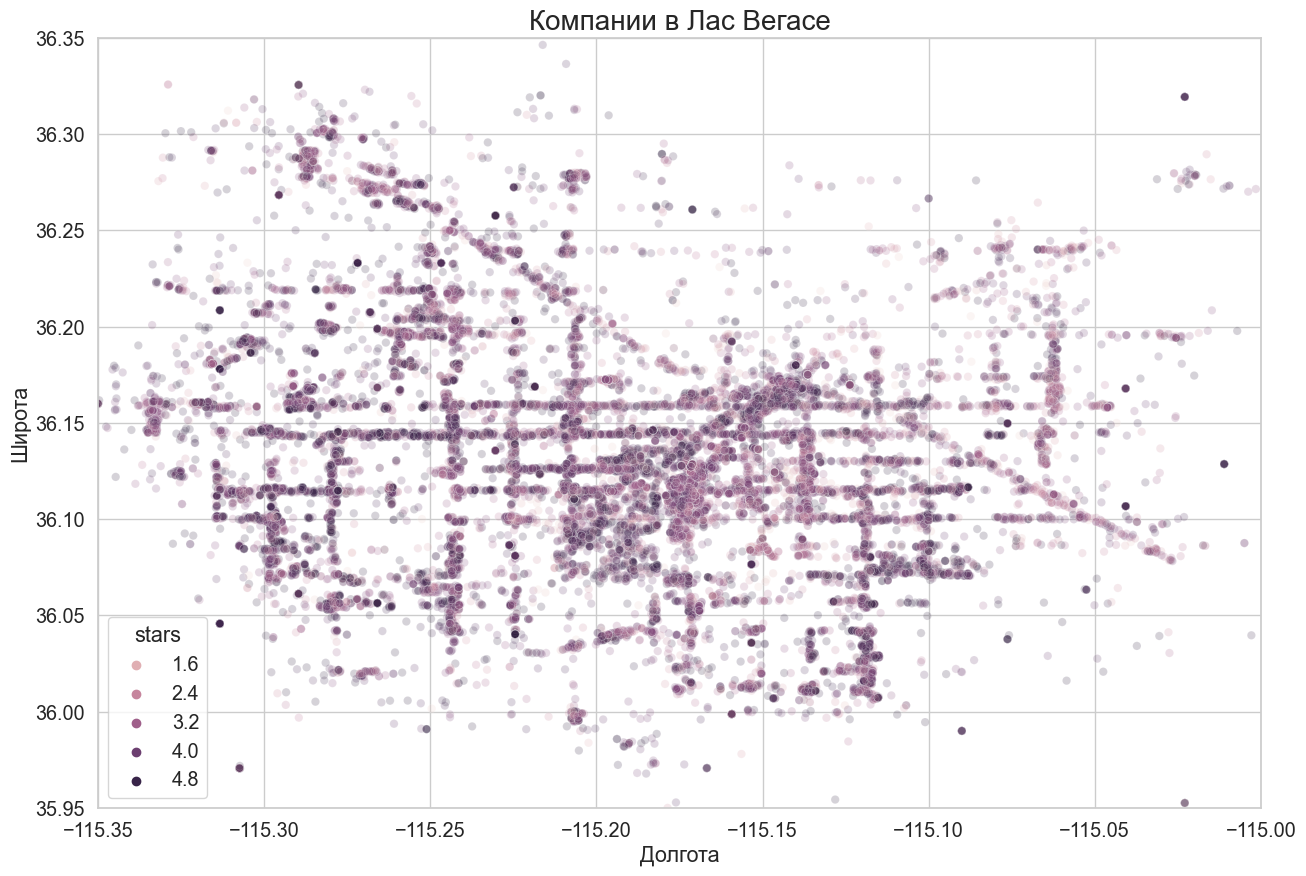

In [36]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='longitude', y='latitude', alpha = 0.2, hue = "stars")

plt.ylim([35.95, 36.35])
plt.xlim([-115.35, -115])

plt.title('Компании в Лас Вегасе', fontsize=20)
plt.xlabel("Долгота")
plt.ylabel("Широта")

plt.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [37]:
districts = data.copy()
districts['longitude'] = districts['longitude'].apply(lambda x: np.round(x*4, decimals=1)*0.25)
districts['latitude'] = districts['latitude'].apply(lambda x: np.round(x*4, decimals=1)*0.25)
districts

,latitude,longitude,categories,name,stars,count
0,36.125,-115.175,Cajun/Creole;Steakhouses;Restaurants,"""Delmonico Steakhouse""",4.088904,1451
1,36.125,-115.175,Arts & Entertainment;Festivals,"""World Food Championships""",3.200000,5
2,36.125,-115.200,Carpet Cleaning;Local Services,"""Dial Carpet Cleaning""",4.928571,14
3,36.050,-115.300,Drywall Installation & Repair;Handyman;Home Se...,"""Pinnacle Restoration""",4.875000,8
4,36.150,-115.125,Pets;Pet Groomers;Pet Services;Pet Stores,"""Lucky's Pet Grooming & Boutique""",3.473684,19
...,...,...,...,...,...,...
26770,36.100,-115.125,Dance Clubs;Gay Bars;Nightlife;Bars,"""Goodtimes Bar & Nightclub""",3.230769,26
26771,36.050,-115.125,Spray Tanning;Beauty & Spas;Tanning,"""Sin City Spray Tans""",5.000000,4
26772,36.125,-115.150,Nightlife;Lounges;Bars,"""American Express Open Business Lounge""",5.000000,3
26773,36.075,-115.150,Hotels & Travel;Airports;Airport Terminals,"""McCarran International Airport Terminal 1 - B""",3.666667,6


Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

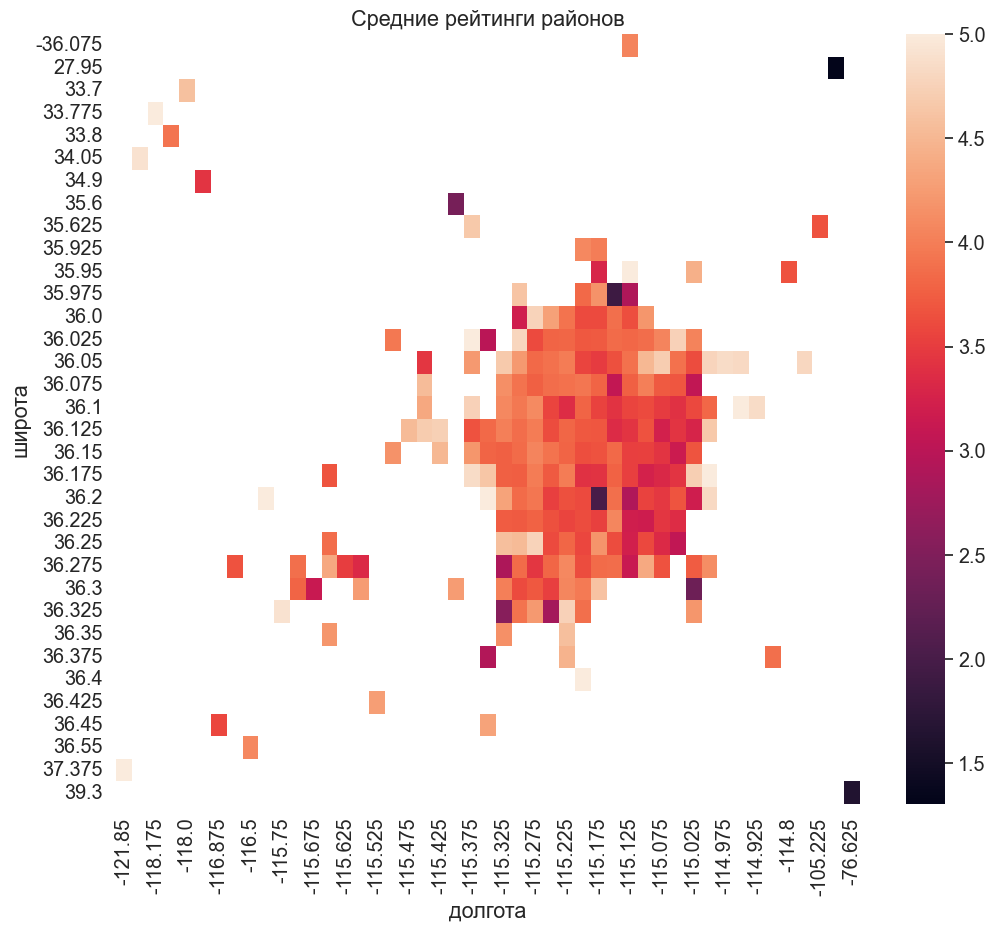

In [38]:
table = pd.pivot_table(districts, index='latitude', columns='longitude', values='stars', aggfunc='mean')

plt.figure(figsize=(12,10))
sns.heatmap(table)

plt.xlabel('долгота')
plt.ylabel('широта')
plt.title('Средние рейтинги районов')

plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 

        1. Если всего 1 компания в районе, то она будет определять рейтинг всего района, что неправильно.
        2. Очевидно, график будет неинформативен, например в ситуации когда все оценки меньше 2, а одна равна 5.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [39]:
tmp = districts.groupby(['latitude', 'longitude']).count()
tmp = tmp[tmp.name >= 30]

rating_districts = districts.copy()

rating_districts = rating_districts.set_index(['latitude', 'longitude']).loc[tmp.index].reset_index()

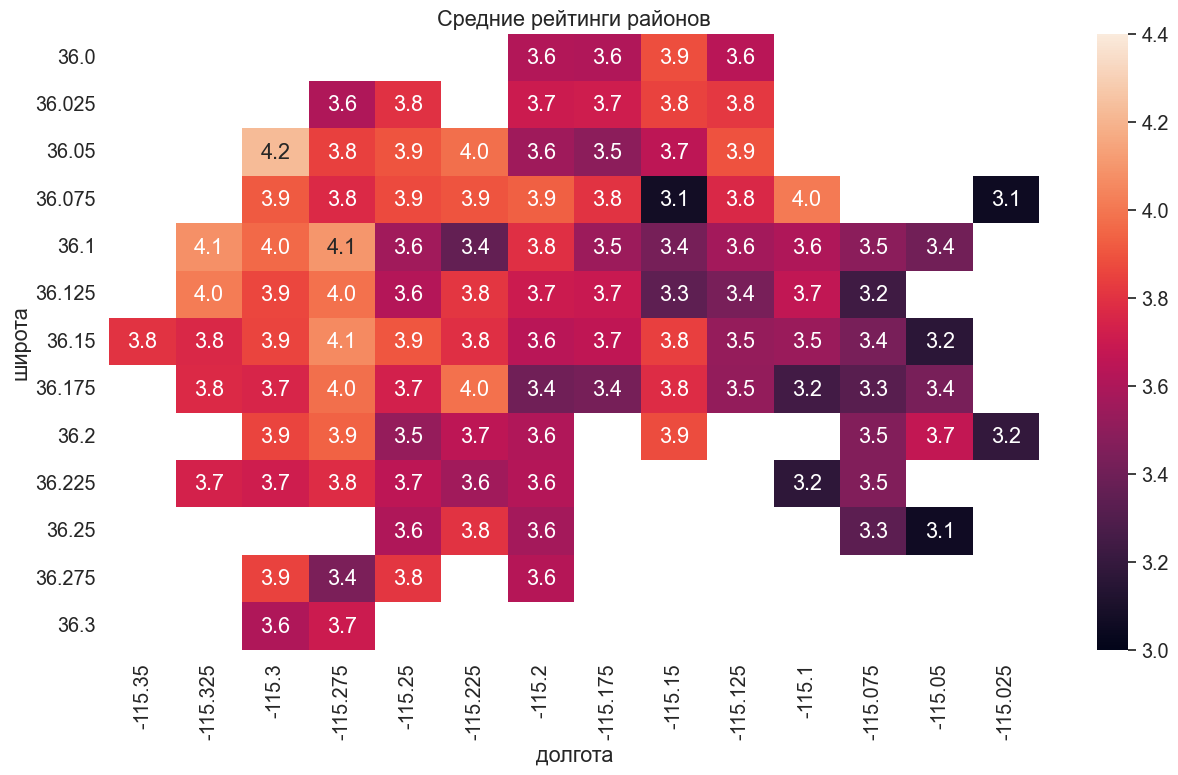

In [40]:
table = pd.pivot_table(rating_districts, index='latitude', columns='longitude', values='stars', aggfunc='mean')


plt.figure(figsize=(15,8))
sns.heatmap(table, vmin=3, vmax=4.4, fmt='.1f', annot=True)

plt.xlabel('долгота')
plt.ylabel('широта')
plt.title('Средние рейтинги районов')

plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Второй график является более информативным, так как мы задали границы цветовой гаммы, чтобы не мешали граничные значения, а также он является более коректным и отражающим приблизительно рейтинг района.

Но при этом выставление границ vmin и vmax тоже имеет недостаток. Если все значения оценок будут выше 4.5, то выставляя границы vmin = 4.5 и vmax = 5 получается, что довольно высокие оценки, а именно 4.5, будут окрашиваться в чёрный цвет - что некорректно.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [41]:
restaurants_rating = districts.copy()
restaurants_rating = restaurants_rating[restaurants_rating['categories'].apply(lambda a : 'restaurant' in a.lower())]
restaurants_rating = restaurants_rating[restaurants_rating['count'] >= 5]
restaurants_rating

,latitude,longitude,categories,name,stars,count
0,36.125,-115.175,Cajun/Creole;Steakhouses;Restaurants,"""Delmonico Steakhouse""",4.088904,1451
6,36.025,-115.175,Sports Bars;Pizza;Restaurants;Nightlife;Bars,"""Double Play Sports Bar""",4.000000,7
14,36.100,-115.175,Hot Dogs;Restaurants,"""Jody Maroni's Sausage Kingdom""",3.000000,5
19,36.100,-115.175,African;Restaurants;Nightlife;Bars;Steakhouses...,"""Bavette's Steakhouse & Bar""",4.736842,38
21,36.275,-115.275,Sushi Bars;Korean;Restaurants,"""Red Ginseng Narita Sushi & BBQ""",3.226667,75
...,...,...,...,...,...,...
26748,36.125,-115.300,Sushi Bars;Japanese;Restaurants;Tapas Bars,"""Kobe Sushi Bar""",3.260664,211
26755,36.100,-115.100,Vegetarian;Restaurants;Mexican,"""Taco Y Taco""",4.152642,511
26756,36.125,-115.175,Restaurants;Mexican,"""Quesadilla""",2.428571,28
26757,36.125,-115.225,Food;Restaurants;Chinese,"""A & K Chinese Restaurant""",4.272727,11


In [42]:
tmp = restaurants_rating.groupby(['latitude', 'longitude']).count()
tmp = tmp[tmp.name >= 10]

restaurants = restaurants_rating.copy()

restaurants = restaurants.set_index(['latitude', 'longitude']).loc[tmp.index].reset_index()
restaurants

,latitude,longitude,categories,name,stars,count
0,36.0,-115.200,Restaurants;Bars;Nightlife;Italian;Delis,"""Spaghetty Western""",4.188540,541
1,36.0,-115.200,Restaurants;Hawaiian,"""Aloha A Go Go""",2.333333,9
2,36.0,-115.200,Restaurants;Japanese;Sushi Bars,"""Xtreme Sushi""",3.377358,106
3,36.0,-115.200,Beer;Wine & Spirits;Food;American (Traditional...,"""The Lodge Cactus""",3.169811,106
4,36.0,-115.200,Fast Food;Restaurants;Food;Desserts;Sandwiches...,"""Dairy Queen""",2.280000,25
...,...,...,...,...,...,...
5331,36.3,-115.275,Sandwiches;Chicken Wings;Restaurants,"""Mom's Good Eats""",4.000000,7
5332,36.3,-115.275,Burgers;Restaurants;Fast Food,"""McDonald's""",2.115385,52
5333,36.3,-115.275,Restaurants;Sports Bars;Bars;Lounges;Nightlife,"""Lucky's Lounge""",3.125000,24
5334,36.3,-115.275,Salad;Sandwiches;Restaurants;American (New);Pizza,"""Table 89""",3.250000,76


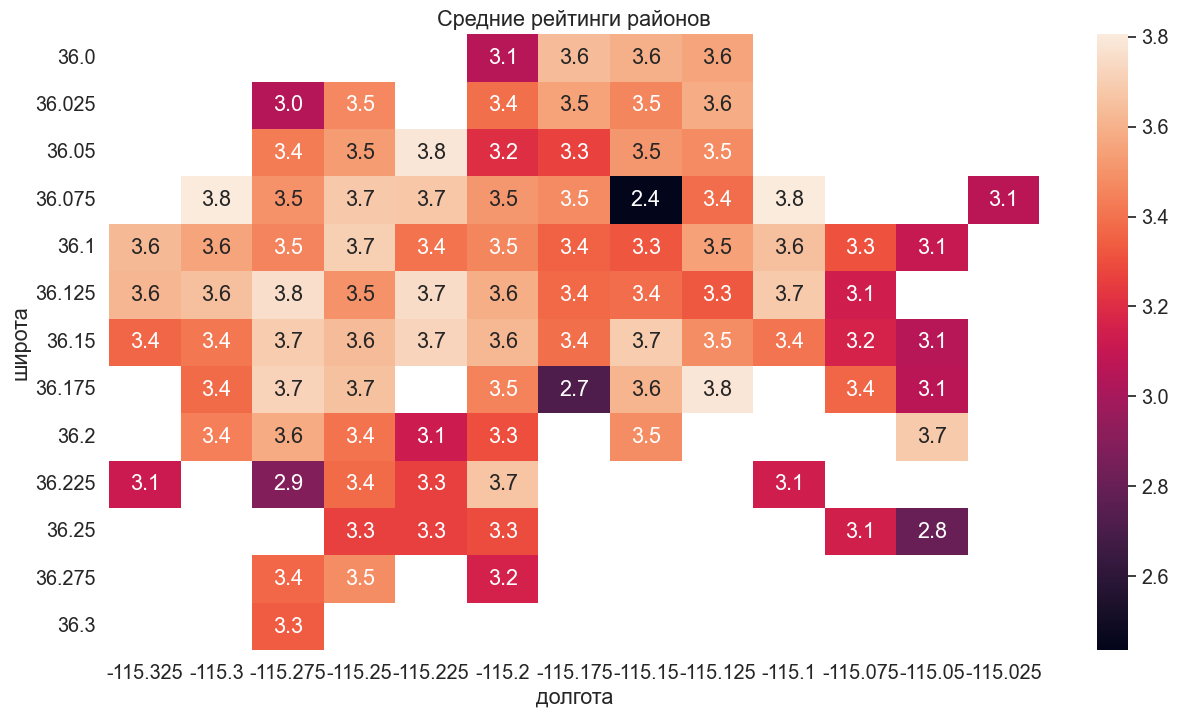

In [43]:
table = pd.pivot_table(restaurants, index='latitude', columns='longitude', values='stars', aggfunc='mean')

plt.figure(figsize=(15,8))
sns.heatmap(table, fmt='.1f', annot=True)

plt.xlabel('долгота')
plt.ylabel('широта')
plt.title('Средние рейтинги районов')

plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Чем больше людей оценили ресторан, тем правильнее будет сделать вывод о нём. Тоже самое с количеством ресторанов в районе: чем их больше, тем репрезентативнее выборка. То есть мы не может судить по качеству ресторана, у которого только один отзыв и не можем судить по району по одному ресторану.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [44]:
tmp = restaurants_rating[restaurants_rating['count'] >= 50]
tmp = tmp.sort_values(by='stars', ascending=False)[['name', 'stars', 'count', 'latitude', 'longitude']]
cat_restaurants = tmp.head(10)

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

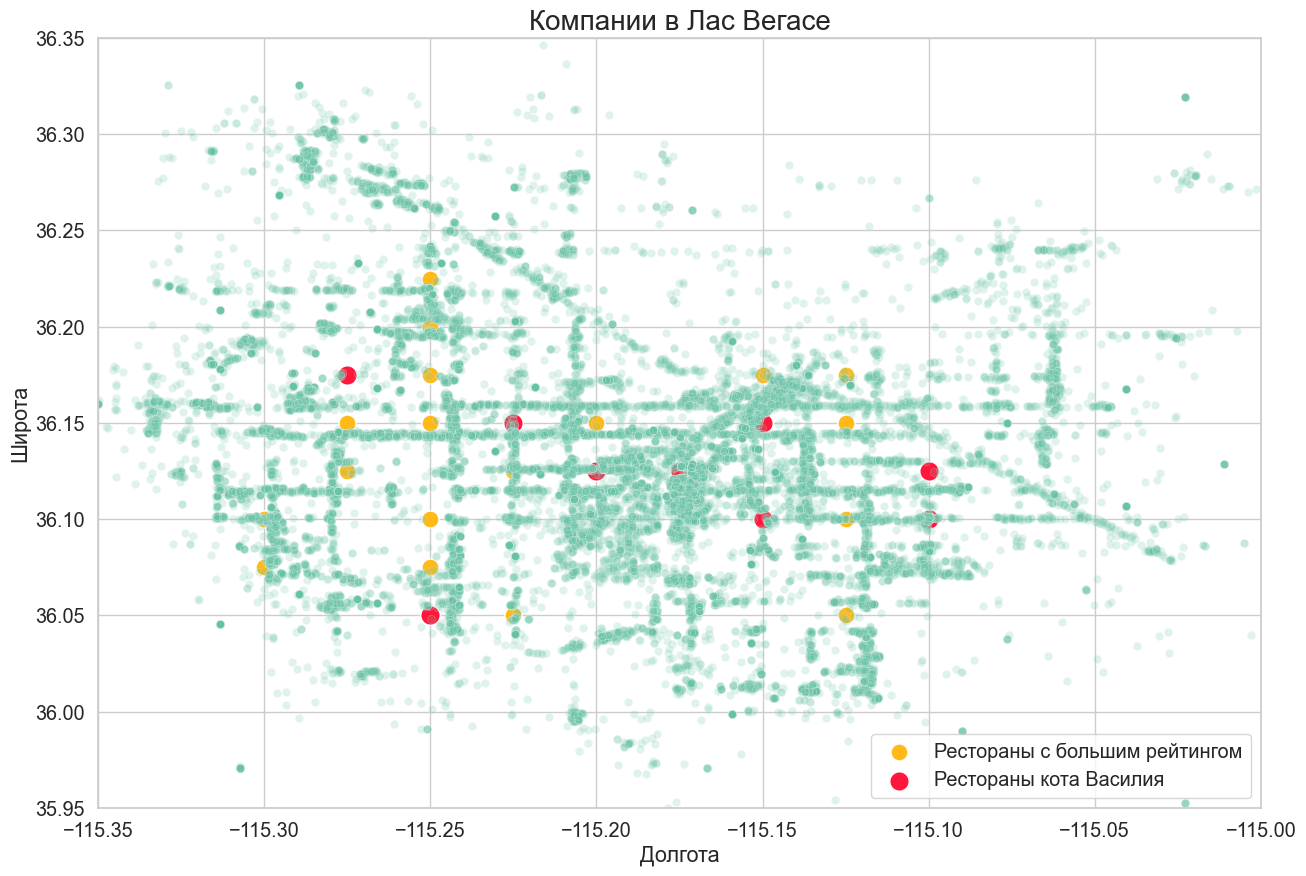

In [49]:
restaurants_rating = restaurants_rating[restaurants_rating['stars'] >= 4.7][restaurants_rating['count'] >= 50]

plt.figure(figsize=(15, 10))

sns.scatterplot(data=restaurants_rating, x='longitude', y='latitude', alpha = 1, label = "Рестораны с большим рейтингом", color = '#FFBA18', s=150)
sns.scatterplot(data=cat_restaurants, x='longitude', y='latitude', alpha = 1, label = "Рестораны кота Василия", color = '#FF183B', s=200)
sns.scatterplot(data=data, x='longitude', y='latitude', alpha = 0.2)
plt.ylim([35.95, 36.35])
plt.xlim([-115.35, -115])

plt.title('Компании в Лас Вегасе', fontsize=20)
plt.xlabel("Долгота")
plt.ylabel("Широта")

plt.show()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Характеризуя кота Василия по данному графику, можно с уверенностью сказать, что в какой точке города он бы ни был, кот довольно быстро бы дошёл до своего "любимого" ресторана, так как красные точки равномерно разбросаны по городу. Однако стоит заметить, что ресторанов с большим рейтингом очень мало в данном городе. 